In [1]:
from defi_etf import DeFiETF
from utils import (Assets, extract_day_of_week, extract_sma_features, extract_threshold_features, get_clean_Xy)
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from strategy import SmaCross, MLWalkForwardStrategy
from backtester import backtest
from typing import Final
import backtesting
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Set assets to:
DeFiPulse


C:\Users\evgenii.saurov\Anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

## Assets 

In [2]:
Assets.names

['uniswap',
 'yearn-finance',
 'aave',
 'maker',
 'sushi',
 'badger-dao',
 'balancer',
 'loopring',
 'kyber-network-crystal',
 'havven',
 'republic-protocol',
 'compound-governance-token']

## Constants

In [3]:
FEES: Final = 0.01
CASH: Final = 10_000
MARGIN: Final = 0.05

## Strategies

In [4]:
STRATEGY: Final = "forecasting"

In [5]:
defi_etf = DeFiETF(assets=Assets)
defi_etf.calculate_price(starting_date="365")

df = defi_etf.price[["etf_price"]].copy()
df["Open"] = df["Close"] = df["High"] = df["Low"] = df["etf_price"]
df = df.drop(columns="etf_price")

print("=========")
print(STRATEGY)
print("=========")

forecasting


In [6]:
extract_sma_features(df)
extract_threshold_features(df, defi_etf.threshold)
extract_day_of_week(df)
df = df.dropna().astype(float)

Classification accuracy:  0.8727272727272727


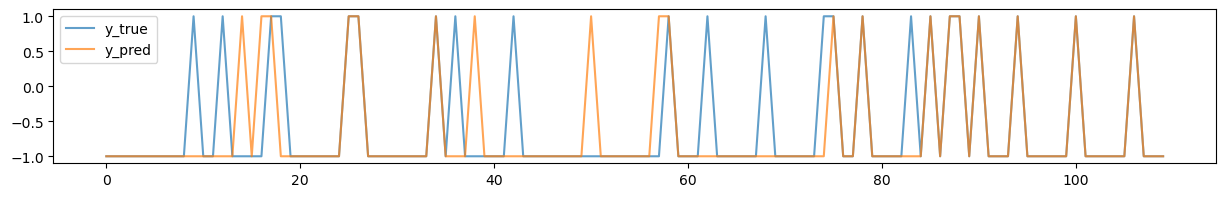

In [13]:
X, y = get_clean_Xy(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [14]:
bt = backtesting.Backtest(df.iloc[:-1], MLWalkForwardStrategy, cash=CASH, commission=FEES, margin=MARGIN)

stats = bt.run()
print(stats)
bt.plot()

Start                     2022-03-14 00:00:00
End                       2022-12-04 00:00:00
Duration                    265 days 00:00:00
Exposure Time [%]                   71.804511
Equity Final [$]                  7672.313961
Equity Peak [$]                       10000.0
Return [%]                          -23.27686
Buy & Hold Return [%]              -82.181567
Return (Ann.) [%]                  -30.481849
Volatility (Ann.) [%]                7.461738
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -23.377251
Avg. Drawdown [%]                  -23.377251
Max. Drawdown Duration      191 days 00:00:00
Avg. Drawdown Duration      191 days 00:00:00
# Trades                                  155
Win Rate [%]                        12.903226
Best Trade [%]                      24.874009
Worst Trade [%]                    -31.423989
Avg. Trade [%]                    

Row(id='3151', ...)